# Solving Systems of Linear Equations

## Here fill in:
- **Group Nr.**: 47
- **Names**: Savinjith Walisadeera, Adam Herbertsson, Tobias Riedel
- **Date of hand-in**: 2023-02-17

## Exercise 1: Matrix manipulations.

1. Define these three matrices
$
A = \begin{pmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{pmatrix}
$
, 
$
B = \begin{pmatrix}
11 & 12 & 13\\
14 & 15 & 16\\
17 & 18 & 19
\end{pmatrix}
$
and 
$
C = \begin{pmatrix}
1 & 2\\
3 & 4\\
5 & 6
\end{pmatrix}
$

2. Use them to perform one matrix addition, one element-wise matrix multiplication and three matrix multiplications. Use the two different matrices in each operation, e.g. $A+B$ not $A+A$.
3. What are the requirements on the matrices dimensions for these three types of operations?
4. What numpy tool returns the dimension of a matrix? Use it on matrix $A$.
5. Concatenate the columns of matrices $A$ and $C$ and print the result, the resulting matrix's dimension should be $3\times5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1 - you can use np.array alone or the combination np.array and np.reshape
#--- Your solution ---#
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(3,3)

B = np.array([11, 12, 13, 14, 15, 16, 17, 18, 19]).reshape(3,3)

C = np.array([1, 2, 3, 4, 5, 6]).reshape(3,2)

print (A,B,C)

[[1 2 3]
 [4 5 6]
 [7 8 9]] [[11 12 13]
 [14 15 16]
 [17 18 19]] [[1 2]
 [3 4]
 [5 6]]


In [3]:

# 2 - Matrix operations 
# calculate A + B,
AB = A + B
print(AB)
# calculate A * B,
AtimesB = np.dot(A,B)
print(AtimesB)
# perform matrix multiplication of A and B,
# perform matrix multiplication of A and C,
# perform matrix multiplication of B and C
#--- Your solution ---#
print(np.dot(A,B))
print(np.dot(A,C))
print(np.dot(A,C))

[[12 14 16]
 [18 20 22]
 [24 26 28]]
[[ 90  96 102]
 [216 231 246]
 [342 366 390]]
[[ 90  96 102]
 [216 231 246]
 [342 366 390]]
[[ 22  28]
 [ 49  64]
 [ 76 100]]
[[ 22  28]
 [ 49  64]
 [ 76 100]]


# 3 - What are the requirements on the matrices dimensions for these three types of operations?
# The requirement in addition is that the matrices have the same dimensions
# The requirement in multiplication is that the first matrix has the same amount of elements in its row as the second in its column.

In [4]:
# 4
#--- Your solution ---#
DimensaionsA = np.shape(A)
print(DimensaionsA)

(3, 3)


In [5]:
# 5 Use np.concatenate and the correct values for the "axis" parameter. Try help(np.concatenate) for more information
#--- Your solution ---#
np.concatenate((A ,B, C), axis=1, dtype = None)

array([[ 1,  2,  3, 11, 12, 13,  1,  2],
       [ 4,  5,  6, 14, 15, 16,  3,  4],
       [ 7,  8,  9, 17, 18, 19,  5,  6]])

## Exercise 2: Lower and upper triangular matrices

Let's create a $5\times5$ matrix called $A$ which values range from 51 to 75. See how the `numpy.arange` and `numpy.reshape` functions are used.

In [6]:
n = 5
val = 51
A = np.arange(val,val+n*n).reshape(n,n) # OR np.arange(51, 76).reshape(5,5) OR np.arange(51, 51+n*n).reshape(n,n)

1. Extract the lower ($L$) and upper ($U$) triangular parts of $A$ (without using `numpy.tril` or `numpy.triu`). Here we say that lower-triangular means that all elements strictly above the diagonal are 0 (and the opposite for upper triangular). Note: this is _not_ a LU-decomposition, which will be seen later in Exercise 4.

2. Create a function to compute the Euclidian norm of $U$ (the square root of the sum of the square of each element). For a square matrix of dimension $n$, we have
$\|U\| = \sqrt{\sum_{1\le i, j \le n} A_{ij}^2}$

Then check if your result is the same as when using `numpy.linalg.norm`

In [7]:
#1
# Initialise L and U as A
L = np.copy(A)
U = np.copy(A)
# now loop on the matrix elements and set to 0 the appropriate ones to get L and U.
#--- Your solution ---#
for j in range(n):
  for i in range(n):
    if i > j:
      L[j,i] = 0

for j in range(n):
  for i in range(n):
    if i < j:
      U[j,i] = 0

print(L)
print(U)

# 2
#--- Your solution ---#
def euclidian_norm(m):
  return np.sum(m**2)**(1/2)

print(euclidian_norm(U))
print(np.linalg.norm(U))

assert np.linalg.norm(U) == euclidian_norm(U)


[[51  0  0  0  0]
 [56 57  0  0  0]
 [61 62 63  0  0]
 [66 67 68 69  0]
 [71 72 73 74 75]]
[[51 52 53 54 55]
 [ 0 57 58 59 60]
 [ 0  0 63 64 65]
 [ 0  0  0 69 70]
 [ 0  0  0  0 75]]
235.2126697267815
235.2126697267815


---
## Note for exercises 3 and 4:
**Do one of the two next exercises (you can do both, of course). They both relate to the _condition number_ but ex. 3 is a bit easier (regarding the code, not the maths) than ex. 4.**

---

## Exercise 3: Condition number
1. Use `numpy.linalg.solve` to solve the system $Ax = b$ where 
$
A = \begin{pmatrix}
0.8647 & 0.5766\\
0.4322 & 0.2822
\end{pmatrix}
$ and 
$
b = \begin{pmatrix}
0.2885 \\
0.1442
\end{pmatrix}$
2. Compute and print the _condition number_ of $A$, which is defined as: $\|A\|  \|A^{-1}\|$. You can re-use your norm function from Exercise 2, or work with `np.linalg.norm`. Use `numpy.linalg.inv` for inverting the matrix.
3. Now add a small perturbation $p=0.0001$ to the element in the first row and first column of $A$ and solve again $Ax = b$. What do you observe on $x$, compared to the former one in question 1? (print their difference)
4. Repeat steps 1 to 3 but now using
$
A = \begin{pmatrix}
8.5 & 1.5\\
1.8 & 3.1
\end{pmatrix}
$ 
5. How would you interpret the condition number?

In [8]:
# 1
A = np.array([0.8647, 0.5766, 0.4322, 0.2822]).reshape(2,2)
b = np.array([0.2885, 0.1442])
#--- Your solution ---#
x1 = np.linalg.solve(A, b)
print(x1)

[ 3.33646867e-01 -7.70983274e-06]


In [9]:
# 2
#--- Your solution ---#
ConditionA = np.linalg.norm(A) * np.linalg.norm(np.linalg.inv(A))
print(ConditionA)

259.5529318566442


In [10]:
# 3 - Instead of rewriting the matrix A, create a matrix dA that contains the perturbation at position (0,0) and zeros elsewhere. Then just add dA to A. 
#--- Your solution ---#
dA = np.array([0.0001, 0, 0, 0]).reshape(2,2)
a = A + dA
x2 = np.linalg.solve(a, b)
print('The difference is:', x2-x1)
##

The difference is: [ 0.00182473 -0.00279464]


In [11]:
# 4
A2 = np.array([8.5, 1.5, 1.8, 3.1]).reshape(2,2)
#--- Your solution ---#
x3 = np.linalg.solve(A2, b)
print(x3)
ConditionA2 = np.linalg.norm(A2) * np.linalg.norm(np.linalg.inv(A2))
print(ConditionA2)
a2 = A2 + dA
x2 = np.linalg.solve(a2, b)
print(x2)
print('The difference is:', x2-x1)

[0.02867019 0.02986892]
3.6934460887949254
[0.02866981 0.02986914]
The difference is: [-0.30497705  0.02987685]


In [ ]:
# 5
# Small value of a conditional number implies that a small error will have a small affect the answer. #
# A large conditional number leads to that a small error will have a large implication on the answer. #

## Exercise 4: Condition number $\star$

Sometimes, you may encounter *ill-conditioned* problems. It means that a small perturbation of just one of the coefficients of your system of linear equations will generate enormous differences in its set of solutions. There are methods to infer whether or not you will meet such an issue even before trying to solve the system. In textbooks, you may read these two methods:
- check if the determinant of A is smaller than the norm of A: $|\det(A)| \ll \|A\| $
- check if the condition number of A (equals to $\|A\|  \|A^{-1}\|$) is large (greater than $100$)

In this exercise you will implement them and compare their results.

### 4.1
Use the functions `np.triu`, `np.ones` and `np.identity` to create the following square matrix of size $n$. Use $n=16$ but your code should be able deal with any value.

$$
A = \left(
\begin{array}{ccccc}
1 & -1 & -1 & \cdots & -1\\
0 &  1 & -1 & \cdots & -1\\
0 &  0 &  1 & \cdots & -1\\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 &  0 & 0 & \cdots & 1\\
\end{array}
\right)
$$

### 4.2 
Solve the system $Ax=b$ with $b^T = (1\quad-1\quad1\quad\cdots\quad-1\quad1\quad-1)$ (so an alternance of $1$ and $-1$ the last value of $b$ depends on the $n$).

### 4.3
Add a small perturbation $-0.01$ on the lower-left element in $A$ and solve again the system $Ax=b$.
Compare these results to those in the question 4.2. What do you observe?

### 4.4 
Test the two methods introduced in the beginning of the exercise. Look for Numpy functions to compute the determinant, the norm and the inverse of matrices. Can you favor one rather than the other? Why? You can see more examples of condition numbers in exercise 3.

In [12]:
# 1
n = 16
#--- Your solution ---#

# 2 
#--- Your solution ---#

# 3 
#--- Your solution ---#

# 4
#--- Your solution ---#

## Exercise 5: Matrix inversion

This exercise refers to the book section 3.3.3, equation 4.147 page 164 but all details will be given here. The task is to code a function that performs a matrix inversion and returns the inverted matrix. The function will be tested on the matrix $A$. The inverted matrix is written $A^{-1}$ and satisfies $AA^{-1} = I$, where $I$ is the identity matrix. We define $A$ as:

$
A = \begin{pmatrix}
2 & 1 & 1\\
1 & 1 & -2\\
1 & 2 & 1
\end{pmatrix}
$. 

The procedure is based on the LU decomposition. To LU-decompose $A$ means to find $L$ and $U$ such as $A = LU$. For that, we will use the function `ludec` given below, which uses the functions `forwsub` and `backsub`, also given. Please read and try to understand what these functions are doing. 

In [13]:
def forwsub(L, b):
    ''' Forward substitution: solves Lx = b where x is the unknown, b is known and L is known ans is a lower triangular matrix'''  
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i]@x[:i])/L[i, i]
    return x

def backsub(U, b):
    ''' Backward substitution: solves Ux = b where x is the unknown, b is known and U is known ans is an upper triangular matrix'''  
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:]@x[i+1:])/U[i, i]
    return x
           
def ludec(A):
    ''' LU decomposition: from the input matrix A, returns L and U such that A = LU, with L and U being lower and upper triangular matrices, respectively'''
    n = A.shape[0]
    U = np.copy(A)
    L = np.identity(n)
    for j in range(n-1):
        for i in range(j+1, n):
            coef = U[i, j]/U[j, j]
            U[i,j:] = U[i,j:] - U[j,j:] * coef
            L[i,j] = coef
    return L, U

In [14]:
A = np.array([2.0, 1., 1., 1, 1, -2, 1, 2, 1]).reshape(3,3)
print(ludec(A))

(array([[1. , 0. , 0. ],
       [0.5, 1. , 0. ],
       [0.5, 3. , 1. ]]), array([[ 2. ,  1. ,  1. ],
       [ 0. ,  0.5, -2.5],
       [ 0. ,  0. ,  8. ]]))


### 5.1
First, LU-decompose $A$. 

### 5.2
Recall that $AA^{-1} = I$ and let's say that $x_i$ and $e_i$ are the column-vectors of $A^{-1}$ and $I$, respectively. Let's assume that the dimension of $A$ is $n$. As a result, we have: 

$A^{-1} = \begin{pmatrix} x_0 & x_1 & ... & x_i & ... & x_{n-1}\end{pmatrix}$ and  $I = \begin{pmatrix} e_0 & e_1 & ... & e_i & ... & e_{n-1}\end{pmatrix}$ 

Thus, inverting $A$ means to solve equation $Ax_i = e_i$ (eq. 4.147 in the book), i.e. find $x_i$. 
Note that since $A = LU$, then you can rewrite $Ax_i = e_i$ as $L(Ux_i) = e_i$. 

Therefore, in your inversion function you should first solve $Ly_i = e_i$. Once $y_i$ is known, then proceed with $Ux_i = y_i$

Solve the first of these equations $Ly_i = e_i$ by forward substitution using `forwsub` (since we’re dealing with a lower-triangular problem). The result can then be used to solve the second equation $Ux_i = y_i$ by back substitution using `backsub` (since it involves an upper-triangular matrix).

### 5.3 
Compare your inverted matrix with the inverted matrix returned by the numpy function `numpy.linalg.inv`

### 5.4 
Propose and implement another way to show that your inversion works (think about the equation satisfied by an inverse matrix).

In [22]:
A = np.array([2.0, 1., 1., 1, 1, -2, 1, 2, 1]).reshape(3,3)

def myinversion(A):
    # 5.1
    #--- Your solution ---#
    L, U = ludec(A)
    # 5.2
    # some initialisation
    n = A.shape[0]
    I = np.identity(n)
    Ainv = np.zeros((n, n)) # the inverted matrix
    # now use forwsub then backsub and return Ainv. Do that inside a loop on the columns indices of the identity and inverted matrices.
    #--- Your solution ---#
    for i in range(n):
        yi = forwsub(L, I[:,i])
        xi = backsub(U, yi)
        Ainv[:,i] = xi
    return Ainv
    
    
# Just to look at the inverted matrix
print(myinversion(A))


[[ 0.625  0.125 -0.375]
 [-0.375  0.125  0.625]
 [ 0.125 -0.375  0.125]]


In [23]:
# 5.3
#--- Your solution
print(np.linalg.inv(A))

[[ 0.625  0.125 -0.375]
 [-0.375  0.125  0.625]
 [ 0.125 -0.375  0.125]]


In [24]:
# 5.4
#--- Your solution ---#
print(A@myinversion(A))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## Exercise 6: Laser tracking equipment

A room is equiped with two lasers that aim at tracking the position of a person walking in it. 
Each laser follows the person and returns the equation of its ray. 
We are interested in the position of the person, that is, the position where the two lasers intersect.

At first, the two lasers are rather close to each other (10 cm apart). Later the second laser will be moved further away.

### 6.1
Plot the rays of the two lasers, given by the equations $y1(x)$ and $y2a(x)$ below. 

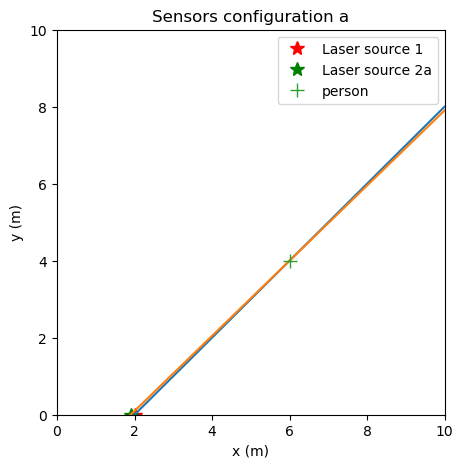

In [25]:
# Define the x axis
step = 0.1
x = np.arange(0,10+step,step)

# Lasers sources positions:
s1x, s1y = 2, 0 # laser_1
s2xa, s2ya = 1.9, 0 # laser_2 position a

# Equation for each laser
a1, b1 = 1, -2  # laser_1
a2a, b2a = 4/4.1, 4-24/4.1  # laser_2
y1 = a1*x +b1
y2a = a2a*x + b2a

# Figure of the room with each laser position and their rays
# The room is seen from above. The position (0,0) is the lower left corner of the room
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(s1x, s1y, 'r*', label='Laser source 1', markersize=10)
ax.plot(s2xa, s2ya, 'g*', label='Laser source 2a', markersize=10)
# 6.1
# Plot the rays from each laser source
#--- Your solution ---#
ax.plot(x, y1)
ax.plot(x, y2a)

ax.plot(6, 4,'+', markersize=10, label = 'person')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title('Sensors configuration a')
ax.legend()
plt.show()

### 6.2
As explained, the two lasers follow the person in the room. That person is at the intersection of the two rays. 

- Figure out the system of linear equations that needs to be solved to compute the coordinates of the intersection. Use it to declare $A$ and $k$ such that $Au=k$, where $A$ is a coefficient matrix, $k$ is a column vector and $u$ is the coordinate of the intersection (also a column vector). Only $u$ is unkown.
- Then use `np.linalg.solve` to get the person's coordinates. Print that output. You should find that the person is located at $x, y =6, 4$ m.

In [26]:
# 6.2
#--- Your solution ---#
A = np.array([a1, -1, a2a, -1]).reshape(2, 2)
k = np.array([-b1, -b2a]).reshape(2, 1)
u = np.linalg.solve(A, k)

print(u)

[[6.]
 [4.]]


### 6.3
Now like any real sensor, some measurement uncertainties will leak into the laser equation.
- Let's apply a small perturbation p = 0.001 on the two slope coefficents: $a1 + p$ and $a2a - p$ and solve the system again. 
- Compute the distance between the position in 6.2 and the one found here.
- Could you have expected this sensitivity to uncertainties (hint: Exercise 3). Explain intuitively why this occurs.

In [27]:
# 6.3
# You only need to make a few changes on the matrix A. Then use again np.linalg.solve
# 
p = 0.001 # the perturbation to apply on a1 and a2a
#--- Your solution ---#
A = np.array([a1+p, -1, a2a-p, -1]).reshape(2, 2)
k = np.array([-b1, -b2a]).reshape(2, 1)
u2 = np.linalg.solve(A, k)
print('ERROR (m):', np.linalg.norm(u-u2))

ERROR (m): 0.6391529076831706


This sensitivity is likely because the two lasers are very close togheter so a small differentiation in the slope of the beam will make them cross in a much different place.

### 6.4 
Above you see what it practically means to have an ill-conditioned problem. A bad setting in a physical system leads to numerical issues. One solution to this is given below, but before reading it, take your time to see what you would do (no need to write it down here, just think).

- - -

So one solution is to move one of the lasers. We will move the second laser source further away along the same wall. It's new position is now: $x, y = 8, 0$. The laser source 1 stays at the same place as before.

- Make a figure of the new configuration and lasers rays.
- Compute and print the person's position
- Apply the same perturbation p = 0.001 on the two slope coefficents: $a1 + p$ and $a2b - p$ and solve the system again. Do you have a more robust system, why?
- On the same figure, add a black dot where the person is located and complete the legend (you can use the _perturbed_ position computed in the previous item)

[[6.]
 [4.]]
ERROR (m): 0.004469156517320929


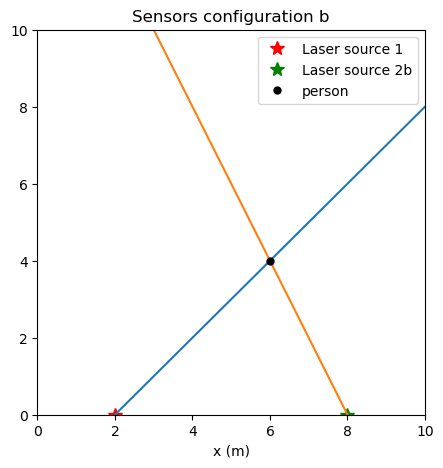

In [28]:
# Let's move laser#2
s2xb, s2yb = 8, 0 # laser 2, position b
a2b, b2b = -2, 16 

# Equation from laser 2, position b
y2b = a2b*x + b2b

# Figure of the new settings
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
ax.plot(s1x, s1y, 'r*', label='Laser source 1', markersize=10)
ax.plot(s2xb, s2yb, 'g*', label='Laser source 2b', markersize=10)
# 6.4 
# o Plot the new laser configuration
#--- Your solution ---#
ax.plot(x, y1)
ax.plot(x, y2b)

ax.set_xlabel('x (m)')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_title('Sensors configuration b')

# o Person's position
# Define and solve the new system of linear equations (same as 5.2 but using the laser 2 position b)
#--- Your solution ---#
A = np.array([a1, -1, a2b, -1]).reshape(2, 2)
k = np.array([-b1, -b2b]).reshape(2, 1)
u3 = np.linalg.solve(A, k)
print(u3)

# o Perturbation
# modify A
#--- Your solution ---#
A = np.array([a1+p, -1, a2b-p, -1]).reshape(2, 2)
k = np.array([-b1, -b2b]).reshape(2, 1)
u4 = np.linalg.solve(A, k)
print('ERROR (m):', np.linalg.norm(u3-u4))

# o Add a black dot where the person is
#--- Your solution ---#
ax.plot(6, 4,'.', color='black', markersize=10, label = 'person')

ax.legend()
plt.show()

The system is more robust because there a now the lines are less parallel meaning the person's position isn't leveraged in the same way.